In [ ]:
import pandas as pd  # Импортируем библиотеку для работы с данными в табличном виде.
import numpy as np  # Импортируем библиотеку для работы с массивами данных.
import tensorflow as tf  # Импортируем библиотеку для работы с нейронными сетями.
import matplotlib.pyplot as plt  # Импортируем библиотеку для создания графиков.
from sklearn.metrics import classification_report, confusion_matrix  # Импортируем функции для оценки качества модели.
from keras.models import Model
from keras.layers import Input, Flatten, Dense  # Импортируем слои для построения нейронной сети.
from keras.models import Sequential  # Импортируем класс для создания последовательной модели нейронной сети.
from keras.applications.vgg16 import VGG16  # Импортируем предобученную модель VGG16.
from keras.datasets import fashion_mnist  # Импортируем датасет Fashion MNIST.
from keras.utils import to_categorical  # Импортируем функцию для преобразования меток в категориальный формат.
from keras.optimizers import Adam  # Импортируем оптимизатор Adam для обучения модели.
import seaborn as sns  # Импортируем библиотеку для красивых графиков.


In [ ]:
# Загрузка данных
# Мы загружаем данные с изображениями одежды и их метками из набора данных Fashion MNIST. Разделяем данные на обучающую и тестовую выборки.
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# Теперь у нас есть набор изображений для обучения модели и другой набор для проверки, насколько хорошо модель учится распознавать одежду.

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
# Проверяем размерности
# Мы смотрим, какого размера наши изображения для обучения и тестирования.
# Это помогает убедиться, что данные загружены правильно и имеют нужный формат.
print(f'Shape of train images: {train_images.shape}')
print(f'Shape of test images: {test_images.shape}')

# Мы увидим, сколько изображений и какого размера в каждом наборе данных (обучающем и тестовом). Это важно для понимания, как будем работать с данными.

Shape of train images: (60000, 28, 28)
Shape of test images: (10000, 28, 28)


In [ ]:
# Изменение размера изображений и их нормализация

# Меняем размер изображений с (28, 28) на (32, 32) и добавляем 3 канала (RGB)

# Меняем размер изображений на 32x32 пикселя, чтобы они соответствовали входным требованиям модели.
train_images = tf.image.resize(np.array(train_images)[..., tf.newaxis], (32, 32))
# Добавляем 3 канала цвета (RGB), так как модель ожидает цветные изображения.
# Нормализуем пиксели, чтобы значения были от 0 до 1, что помогает модели обучаться лучше.
train_images = np.repeat(train_images, 3, axis=-1)
test_images = tf.image.resize(np.array(test_images)[..., tf.newaxis], (32, 32))
test_images = np.repeat(test_images, 3, axis=-1)

# Нормализуем значения пикселей от 0 до 1
train_images = np.array(train_images) / 255.0
test_images = np.array(test_images) / 255.0

# Проверяем размерности после изменения размера и нормализации
print(f'Shape of train images after resize and normalization: {train_images.shape}')
print(f'Shape of test images after resize and normalization: {test_images.shape}')


Shape of train images after resize and normalization: (60000, 32, 32, 3)
Shape of test images after resize and normalization: (10000, 32, 32, 3)


In [ ]:
# Мы убедились, что изображения теперь имеют нужный размер и формат.
# Проверяем, что после нормализации значения пикселей в правильном диапазоне.

In [ ]:
# Преобразуем метки классов в формат one hot, где каждая метка представлена в виде вектора с единицей на месте класса и нулями в остальных местах.
# Это нужно, чтобы модель могла правильно обучаться и делать прогнозы.

# Конвертация меток в формат one hot
NUM_CLASSES = len(np.unique(train_labels))  # Узнаем количество уникальных меток (классов)
train_labels = to_categorical(train_labels, NUM_CLASSES)  # Преобразуем метки в формат one hot для обучающего набора
test_labels = to_categorical(test_labels, NUM_CLASSES)  # Преобразуем метки в формат one hot для тестового набора

# Метки классов теперь находятся в правильном формате для обучения модели, что позволяет ей понимать, какие классы мы хотим распознавать.

In [ ]:
print(train_labels)
print(test_labels)

[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
# Вот что можно понять из этих ↑ данных:
# Мы видим, что каждая строка в train_labels и test_labels содержит только один элемент равный 1,
# а остальные — 0. Это значит, что каждая метка класса корректно представлена в формате one hot.
# Эти векторы one hot нужны модели для того, чтобы она могла понять, какой класс является правильным ответом для каждого изображения.
# Теперь модель сможет использовать эти метки для обучения и проверки, что она правильно классифицирует изображения.

In [ ]:
# Определение callback для ранней остановки

# Создаем класс для ранней остановки тренировки
class myCallback(tf.keras.callbacks.Callback):
  # Создаем правила для остановки обучения, если точность на тренировочных данных значительно выше, чем на валидационных (чтобы избежать переобучения).
    def on_epoch_end(self, epoch, logs={}):
        # Если разница между точностью на тренировочных и валидационных данных больше 5% и прошли больше 5 эпох
        if logs.get('accuracy') - logs.get('val_accuracy') >= 0.05 and epoch > 5:
            print(f"\nThe difference between train accuracy and validation more than 5% so cancelling training!")
            self.model.stop_training = True  # Останавливаем обучение

callbacks = myCallback()  # Создаем объект нашего callback

# Настройка ранней остановки при отсутствии улучшений
# patience=10 Настраиваем автоматическую остановку обучения, если валидационная ошибка не улучшается в течение 10 эпох.
# monitor='val_loss': Это означает, что мы следим за значением ошибки на валидационных данных. Если эта ошибка не улучшается, мы выполняем действие.
# restore_best_weights=True: Это означает, что после остановки обучения (из-за отсутствия улучшений) веса модели будут восстановлены до лучших значений,
# которые были на момент минимальной валидационной ошибки.
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_loss', restore_best_weights=True)

# Настройка уменьшения скорости обучения, если валидационная ошибка не улучшается
# monitor='val_loss' — мы следим за значением ошибки на валидационных данных.
# factor=0.2 — если ошибка не улучшается, скорость обучения будет уменьшена в 5 раз (0.2 означает 20% от текущей скорости).
# patience=3 — если ошибка на валидации не улучшается в течение 3 эпох, то срабатывает уменьшение скорости обучения.
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3)

# Мы используем эти настройки, чтобы сделать обучение модели более эффективным, предотвратить переобучение и улучшить её производительность.

In [ ]:
# Создание базовой модели VGG16
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
conv_base.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
# Вот что можно понять из ↑:
# модель VGG16 и её веса загружаются из интернета через Keras.
# Keras получает файл весов с сервера и использует его, чтобы модель могла сразу работать, не обучаясь заново.
# Файл весов помогает модели распознавать изображения, потому что эти веса уже были обучены на большом наборе данных (ImageNet).
# 58889256/58889256: показывает общий размер файла (58,889,256 байт) и сколько из него уже загружено (тоже 58,889,256 байт).
# ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step: показывает, что загрузка заняла 2 секунды и 0 микросекунд на шаг.

In [ ]:
# Создание модели с VGG16

# Загружаем предобученную модель VGG16, которая уже обучена на большом наборе изображений (ImageNet).
# Используем её как основу для нашей модели, но не будем обучать её заново (trainable=False).
model_vgg = Sequential([
    conv_base,
    Flatten(),
    Dense(256, activation="relu"),
    Dense(NUM_CLASSES, activation="softmax")
])

model_vgg.compile(optimizer=Adam(learning_rate=0.003), loss='categorical_crossentropy', metrics=['accuracy'])
# Мы используем мощную и проверенную модель VGG16 для извлечения признаков из изображений, что поможет улучшить результаты нашей модели.
#  Модель будет фиксированной и не изменится в процессе обучения.

In [ ]:
# Обучение модели
# Мы обучаем нашу модель на тренировочных данных.
# Используем дополнительные функции (callback'и), чтобы контролировать обучение,
# уменьшать скорость обучения при необходимости и останавливать обучение, если оно не улучшает результаты.

history_vgg = model_vgg.fit(
    train_images,  # Данные для обучения
    train_labels,  # Метки классов для обучения
    epochs=25,  # Обучаем модель в течение 25 эпох
    verbose=1,  # Показываем информацию о процессе обучения
    batch_size=250,  # Размер пакета данных для одного шага обучения
    validation_split=0.2,  # 20% данных используем для проверки модели во время обучения
    callbacks=[callbacks, reduce_lr, early_stopping]  # Используем заранее настроенные функции для контроля обучения
)
# Модель будет обучаться на тренировочных данных, и мы сможем наблюдать за её процессом и улучшениями благодаря настройкам и функциям, которые мы добавили.

Epoch 1/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.7214 - loss: 0.7986 - val_accuracy: 0.8352 - val_loss: 0.4569 - learning_rate: 0.0030
Epoch 2/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.8434 - loss: 0.4270 - val_accuracy: 0.8453 - val_loss: 0.4216 - learning_rate: 0.0030
Epoch 3/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.8600 - loss: 0.3830 - val_accuracy: 0.8515 - val_loss: 0.4048 - learning_rate: 0.0030
Epoch 4/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.8672 - loss: 0.3611 - val_accuracy: 0.8535 - val_loss: 0.4023 - learning_rate: 0.0030
Epoch 5/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.8733 - loss: 0.3434 - val_accuracy: 0.8584 - val_loss: 0.3872 - learning_rate: 0.0030
Epoch 6/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.8796 - loss: 0.3218 - val_accuracy: 0.8623 - val_loss: 0.3776 - learning_rate: 0.0030
Epoch 7/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.8847 - loss:

In [ ]:
# Вот что можно понять из ↑:
#  Модель обучалась 17 эпох (цикл), хотя планировалось 25.
#  Точность модели на обучающем наборе данных и на проверочном (валидационном) наборе данных увеличивалась с каждой эпохой.
#  Когда разница между точностью на обучающем наборе и проверочном стала больше 5%, обучение было остановлено.
#  На последних эпохах точность модели достигла около 93% на обучающем наборе и 88% на проверочном наборе
#  Модель обучилась хорошо, но чтобы избежать переобучения, обучение остановили раньше.

In [ ]:
# Оценка модели
# Мы проверяем, насколько хорошо наша модель работает на тестовых данных.
# Это помогает узнать, как модель справляется с новыми данными, которые она не видела во время обучения.
model_vgg.evaluate(test_images, test_labels)
# Мы получим информацию о точности и ошибке модели на тестовых данных, чтобы понять, насколько она хороша в распознавании изображений.

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8790 - loss: 0.3505


[0.36166712641716003, 0.8755999803543091]

In [ ]:
# Вот что можно понять из ↑:
# Мы проверили, как хорошо модель работает на тестовых изображениях.
# Модель правильно классифицировала 87.9% изображений.
# Средняя ошибка модели составляет 0.3505.
# Модель показывает хорошие результаты на тестовых данных

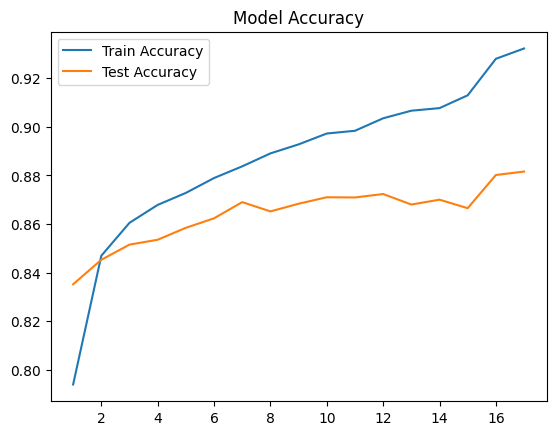

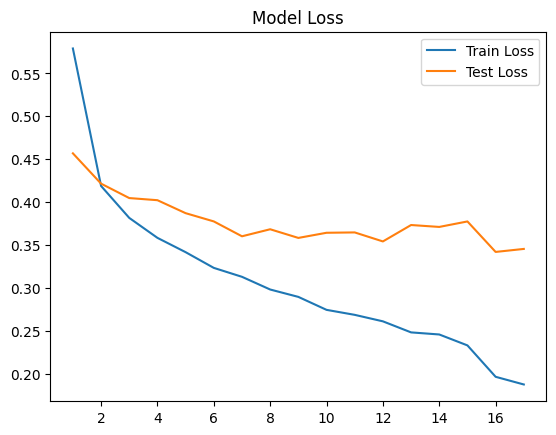

In [ ]:
# Мы строим графики, чтобы визуально увидеть, как изменяются точность и потери модели во время обучения.
# Это помогает понять, как хорошо модель обучалась и как её производительность менялась на тренировочных и тестовых данных.

# Построение графиков
result = pd.DataFrame(history_vgg.history)  # Создаем таблицу с результатами обучения

# График точности модели
plt.plot(list(range(1, result.shape[0]+1)), result['accuracy'], label='Train Accuracy')  # Точность на тренировочных данных
plt.plot(list(range(1, result.shape[0]+1)), result['val_accuracy'], label='Test Accuracy')  # Точность на тестовых данных
plt.legend()  # Показываем легенду
plt.title('Model Accuracy')  # Заголовок графика
plt.show()  # Показываем график

# График потерь модели
plt.plot(list(range(1, result.shape[0]+1)), result['loss'], label='Train Loss')  # Потери на тренировочных данных
plt.plot(list(range(1, result.shape[0]+1)), result['val_loss'], label='Test Loss')  # Потери на тестовых данных
plt.legend()  # Показываем легенду
plt.title('Model Loss')  # Заголовок графика
plt.show()  # Показываем график

# Мы увидим, улучшалась ли точность и уменьшались ли потери модели с течением времени, что поможет понять, насколько эффективно было обучение.

In [ ]:
# обзор архитектуры модели
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 1, 1, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 7,079,424 (27.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [ ]:
# Вот что можно понять из ↑:
# Модель VGG16 состоит из нескольких слоёв, которые обрабатывают изображения.
# У модели 14,7 миллионов параметров. Это числа, которые модель учит, чтобы лучше распознавать изображения.
# Из них только половина — обучаемые параметры (7 миллионов). Это те, которые мы можем изменять при обучении.
# Остальные параметры — не обучаемые. Это означает, что они уже настроены, и мы их не меняем, когда обучаем модель на новых данных.
# Модель большая и мощная, но требует много вычислений.

In [ ]:
# Мы добавляем уникальные имена к каждому слою модели, чтобы их легче было отличать.
# Это нужно, чтобы знать, какой именно слой мы используем или изменяем.

# Создание нового списка слоев с уникальными именами
new_layers = []

# Обновление слоев модели
for i, layer in enumerate(conv_base.layers):
    layer.name = layer.name + 'layer' + str(i)  # Присваиваем уникальное имя
    new_layers.append(layer)

# Создание новой модели с обновленными слоями
x = Flatten()(new_layers[-1].output)  # Добавляем слой Flatten
x = Dense(256, activation='relu')(x)  # Добавляем Dense слой
output = Dense(NUM_CLASSES, activation='softmax')(x)  # Добавляем выходной слой

# Теперь каждый слой модели имеет уникальное имя, что помогает при работе с моделью и отслеживании её слоев.

In [ ]:
# Печатаем имена всех слоев модели
for layer in model_vgg.layers:
    print(layer.name)

vgg16
flatten
dense
dense_1


In [ ]:
# Вот что можно понять из ↑:
# слои модели теперь имеют уникальные имена
# vgg16 — это имя слоя, соответствующего базовой модели VGG16.
# flatten — это слой, который преобразует данные в одномерный вид.
# dense и dense_1 — это полносвязные слои (Dense), добавленные к модели.
# Уникальные имена помогают легко различать и отслеживать слои модели, особенно если нужно их изменять или анализировать.

In [ ]:
# Модификация слоев VGG16
# Мы хотим заморозить (не обучать) все слои модели до слоя block5_conv1.
# Слои после block5_conv1 будут обучаться, чтобы они могли адаптироваться к нашим данным.
# Модель будет обучать только последние слои, что позволяет сохранить уже обученные слои и улучшить обучение на новых данных.

conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))  # Загружаем VGG16 без верхних слоев
set_trainable = False  # Сначала не разрешаем обучение слоям
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':  # Находим слой с именем 'block5_conv1'
        set_trainable = True  # Разрешаем обучение после этого слоя
    if set_trainable:
        layer.trainable = True  # Разрешаем обучение слоям после 'block5_conv1'
    else:
        layer.trainable = False  # Не разрешаем обучение слоям до 'block5_conv1'


In [ ]:
# Создание и компиляция модифицированной модели

# Мы создаём новую модель, которая включает предобученную часть VGG16 и добавляем собственные слои для классификации.
modified_model = tf.keras.models.Sequential([
    conv_base,  # Используем предобученную часть модели VGG16
    Flatten(),  # Преобразуем 3D-данные в 1D
    Dense(256, activation='relu'),  # Добавляем полносвязный слой с 256 нейронами и функцией активации ReLU
    Dense(NUM_CLASSES, activation='softmax'),  # Добавляем выходной слой с количеством нейронов, равным числу классов, и функцией активации Softmax
])

# Мы компилируем модель, чтобы она могла обучаться и оцениваться на данных.
modified_model.compile(
    optimizer=Adam(learning_rate=0.000024),  # Оптимизатор Adam с маленькой скоростью обучения
    loss='categorical_crossentropy',  # Функция потерь для многоклассовой классификации
    metrics=['accuracy']  # Метрика точности для оценки модели
)
# Модель готова к обучению и оценке. Она будет использовать VGG16 для извлечения признаков и добавленные слои для классификации изображений.

In [ ]:
# Обучение модифицированной модели
# Мы обучаем модифицированную модель на обучающих данных.
# Используем проверки, чтобы следить за процессом обучения и автоматически останавливать его при необходимости.
history_vgg = modified_model.fit(
    train_images,  # Обучающие изображения
    train_labels,  # Метки для обучающих изображений
    epochs=25,  # Количество эпох (сколько раз модель будет проходить через все данные)
    verbose=1,  # Показ подробной информации о процессе обучения
    batch_size=250,  # Размер батча (количество изображений для обработки за один раз)
    validation_split=0.2,  # Доля данных, используемая для проверки модели (20%)
    callbacks=[callbacks, reduce_lr, early_stopping]  # Используемые функции для улучшения обучения
)
# Модель обучается на изображениях и метках. Мы получаем информацию о том, как хорошо она работает на обучающих и проверочных данных.

Epoch 1/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 13s 43ms/step - accuracy: 0.6711 - loss: 1.0083 - val_accuracy: 0.8652 - val_loss: 0.3705 - learning_rate: 2.4000e-05
Epoch 2/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - accuracy: 0.8748 - loss: 0.3445 - val_accuracy: 0.8825 - val_loss: 0.3185 - learning_rate: 2.4000e-05
Epoch 3/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.8951 - loss: 0.2943 - val_accuracy: 0.8878 - val_loss: 0.3075 - learning_rate: 2.4000e-05
Epoch 4/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.9005 - loss: 0.2711 - val_accuracy: 0.8973 - val_loss: 0.2834 - learning_rate: 2.4000e-05
Epoch 5/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.9112 - loss: 0.2421 - val_accuracy: 0.8997 - val_loss: 0.2754 - learning_rate: 2.4000e-05
Epoch 6/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.9166 - loss: 0.2293 - val_accuracy: 0.9018 - val_loss: 0.2692 - learning_rate: 2.4000e-05
Epoch 7/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step -

In [ ]:
# Вот что можно понять из ↑:
# Модель обучается на 25 эпохах.
# Точность (accuracy) на тренировочных данных (train accuracy) постепенно увеличивается и достигает 96.31% на последней эпохе.
# Потери (loss) на тренировочных данных уменьшаются и достигают 0.1158 на последней эпохе.
# Точность на проверочных данных (validation accuracy) также растет и достигает 91.78% на последней эпохе.
# Потери на проверочных данных (validation loss) немного уменьшаются, достигая 0.2327 на последней эпохе.
# Модель становится лучше в распознавании изображений с каждым эпохом, и её точность и потеря улучшаются как на тренировочных, так и на проверочных данных.

In [ ]:
# Предсказания и визуализация

# Мы используем обученную модель для предсказания, какие классы она считает правильными для тестовых изображений.
predictions = modified_model.predict(test_images)  # Получаем предсказания модели для тестовых изображений

# Мы получаем результаты работы модели на новых данных, которые можно использовать для оценки её точности и визуализации результатов.

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [ ]:
# Вот что можно понять из ↑:
# Результат показывает, что модель обработала все тестовые изображения и дала свои предсказания за 3 секунды.
# Когда мы используем модель для предсказания, она смотрит на новые изображения и говорит, что она думает, что на них изображено.
# Так мы можем проверить, насколько хорошо модель умеет угадывать, и увидеть, как хорошо она работает на новых данных.

In [ ]:
print(predictions)  # Показываем предсказания модели для тестовых изображений

[[6.64669528e-08 4.31989911e-09 1.22816516e-06 ... 6.04105066e-04
  7.42549702e-08 9.99390602e-01]
 [1.05600164e-04 1.46056627e-05 9.98642623e-01 ... 1.45140825e-06
  9.05994625e-07 3.30197224e-07]
 [1.98751636e-07 9.99970198e-01 2.72001962e-05 ... 1.01513997e-08
  1.80158946e-08 1.00235322e-08]
 ...
 [5.88927060e-06 7.94072790e-08 1.60763506e-07 ... 1.53947131e-08
  9.99981880e-01 1.45536712e-08]
 [1.32834441e-06 9.99956131e-01 8.36339132e-06 ... 1.82106632e-08
  1.13251787e-07 1.18740218e-08]
 [8.65751877e-03 3.72929862e-05 3.78418434e-03 ... 6.99093521e-01
  1.27791036e-02 7.94609264e-02]]


In [ ]:
# ↑:
# Эти числа — это предсказания модели для тестовых изображений. Каждое число показывает вероятность того, что изображение относится к разным классам.
# Например, если в строке много чисел близких к 0, а одно число близко к 1, это означает, что модель думает, что изображение относится к классу, где это число ближе к 1.
# Так мы можем понять, к какому классу модель отнесла каждое изображение.

In [ ]:
# Мы преобразуем вероятности предсказаний и истинные метки в классы, чтобы можно было сравнить их.
predicted_labels = np.argmax(predictions, axis=1)  # Находим класс с максимальным значением вероятности для каждого предсказания
true_labels = np.argmax(test_labels, axis=1)  # Находим истинный класс для каждого тестового изображения
# Мы получаем списки классов для предсказаний и истинных меток, что помогает нам понять, как модель справляется с классификацией.

In [ ]:
print("Predicted labels:", predicted_labels)  # Показываем предсказанные классы для тестовых изображений
print("True labels:", true_labels)  # Показываем истинные классы для тестовых изображений

Predicted labels: [9 2 1 ... 8 1 7]
True labels: [9 2 1 ... 8 1 5]


In [ ]:
# ↑: Модель правильно предсказала многие классы, но есть ошибки. Например, модель подумала, что изображение принадлежит классу 7, но на самом деле это класс 5.

In [ ]:
# Мы запускаем этот код, чтобы проверить, насколько точно модель предсказывает правильные классы для каждого объекта.
# Это помогает понять, где модель ошибается и как её можно улучшить.
predicted_labels = np.argmax(predictions, axis=1)  # Преобразуем предсказания модели в метки классов (выбираем класс с наибольшей вероятностью)
true_labels = np.argmax(test_labels, axis=1)  # Преобразуем истинные метки в числовой формат (так же выбираем метки с наибольшей вероятностью)
report = classification_report(true_labels, predicted_labels, target_names=class_names)  # Создаем отчет, который показывает, насколько хорошо модель предсказывает для каждого класса
print(report)  # Выводим отчет на экран, чтобы увидеть, как хорошо модель работает для каждого класса


              precision    recall  f1-score   support

 T-shirt/top       0.87      0.87      0.87      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.88      0.86      0.87      1000
       Dress       0.90      0.90      0.90      1000
        Coat       0.82      0.88      0.85      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.77      0.72      0.74      1000
     Sneaker       0.96      0.97      0.96      1000
         Bag       0.98      0.99      0.98      1000
  Ankle boot       0.98      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [ ]:
# ↑:

# print(report):
# Показывает отчет о классификации.
# Включает precision, recall, f1-score и поддержку (support) для каждого класса.
# Помогает понять, насколько хорошо модель справляется с каждым классом.

# Precision показывает, насколько точно модель предсказывает каждую вещь. Чем выше, тем лучше.
# Recall показывает, насколько хорошо модель находит все вещи этого класса.
# F1-score — это баланс между precision и recall. Чем выше, тем лучше.
# Модель хорошо работает в целом:

# Точность (accuracy) 91% означает, что большинство предсказаний правильные.
# Модель лучше всего распознает штаны (Trouser) и сандалии (Sandal).
# Модель имеет некоторые трудности с рубашками (Shirt), но все равно достаточно хорошо работает.

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


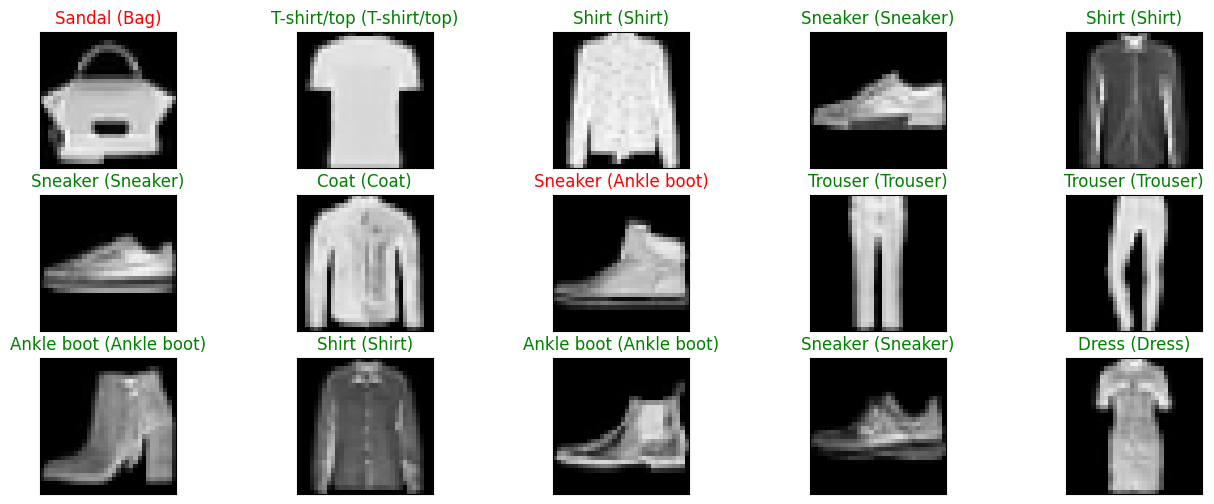

In [ ]:
# Этот код показывает, насколько точно модель предсказывает класс для случайных изображений.
# Мы видим изображения и их предсказанные классы (сравнивая с правильными классами). Это помогает быстро понять, где модель ошиблась.

predictions = model_vgg.predict(test_images)  # Получаем предсказания модели для всех тестовых изображений

figure = plt.figure(figsize=(16, 6))  # Создаем фигуру для отображения изображений
display_images = np.random.choice(test_images.shape[0], size=15, replace=False)  # Выбираем случайные 15 изображений из тестового набора

for i, index in enumerate(display_images):  # Для каждого случайного изображения:
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])  # Добавляем изображение в сетку 3x5, убираем оси
    ax.imshow(test_images[index], cmap='gray')  # Показываем изображение в оттенках серого
    predict_index = np.argmax(predictions[index])  # Определяем класс, который предсказала модель
    #print(f'{predict_index}: {class_names[predict_index]}')
    true_index = np.argmax(test_labels[index])  # Определяем истинный класс изображения
    # В заголовке отображаем предсказанный и истинный классы. Если предсказание верно — цвет зеленый, если нет — красный.
    ax.set_title("{} ({})".format(class_names[predict_index],
                                  class_names[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

# Зеленый цвет заголовка показывает, что модель предсказала правильно, а красный — что ошиблась. Так мы можем видеть, какие классы модель путает чаще всего.

In [ ]:
# Классификационный отчет
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']  # Названия классов для отображения

# Мы создаем и выводим отчет, который показывает, насколько хорошо модель справляется с классификацией каждого класса.
report = classification_report(true_labels, predicted_labels, target_names=class_names)  # Создаем отчет о том, как хорошо модель классифицирует каждый класс
print(report)  # Показываем отчет на экране
# Мы видим, как хорошо модель предсказывает каждый класс, и можем понять, где модель работает хорошо или плохо.

              precision    recall  f1-score   support

 T-shirt/top       0.87      0.87      0.87      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.88      0.86      0.87      1000
       Dress       0.90      0.90      0.90      1000
        Coat       0.82      0.88      0.85      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.77      0.72      0.74      1000
     Sneaker       0.96      0.97      0.96      1000
         Bag       0.98      0.99      0.98      1000
  Ankle boot       0.98      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [ ]:
# ↑:

# print(report):
# Показывает отчет о классификации.
# Включает precision, recall, f1-score и поддержку (support) для каждого класса.
# Помогает понять, насколько хорошо модель справляется с каждым классом.

# Precision показывает, насколько точно модель предсказывает каждую вещь. Чем выше, тем лучше.
# Recall показывает, насколько хорошо модель находит все вещи этого класса.
# F1-score — это баланс между precision и recall. Чем выше, тем лучше.
# Модель хорошо работает в целом:

# Точность (accuracy) 91% означает, что большинство предсказаний правильные.
# Модель лучше всего распознает штаны (Trouser) и сандалии (Sandal).
# Модель имеет некоторые трудности с рубашками (Shirt), но все равно достаточно хорошо работает.

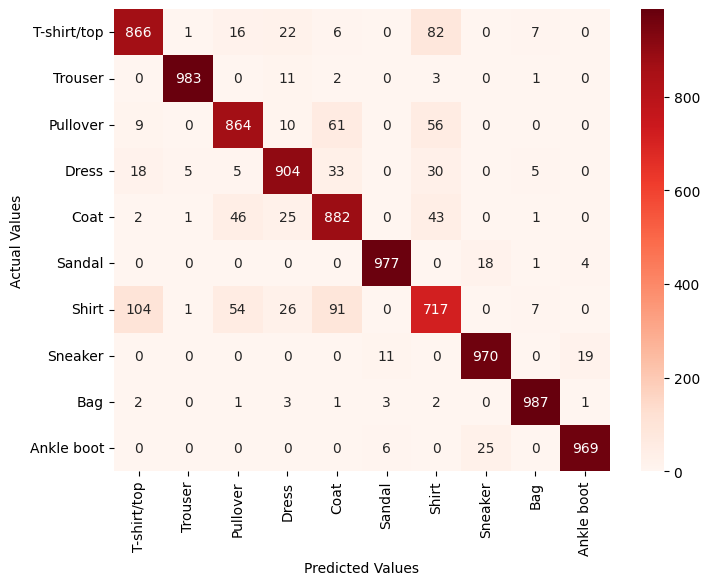

In [ ]:
# Матрица путаницы

# Мы создаем и отображаем матрицу путаницы, чтобы визуально увидеть, сколько раз модель правильно или неправильно классифицировала изображения.
cm = confusion_matrix(true_labels, predicted_labels)  # Создаем матрицу путаницы, которая показывает, сколько раз модель ошиблась в классификации

plt.figure(figsize=(8, 6))  # Определяем размер графика
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=class_names, yticklabels=class_names)  # Строим тепловую карту матрицы путаницы
plt.xlabel('Predicted Values')  # Подпись оси X
plt.ylabel('Actual Values')  # Подпись оси Y
plt.show()  # Показываем график
# Мы можем увидеть, какие классы модель путала, и понять, где её предсказания наиболее и наименее точны.

In [ ]:
# преобразует матрицу путаницы в таблицу, где строки и столбцы подписаны именами классов
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)

# Выводим таблицу матрицы путаницы
print(cm_df)

             T-shirt/top  Trouser  Pullover  Dress  Coat  Sandal  Shirt  \
T-shirt/top          866        1        16     22     6       0     82   
Trouser                0      983         0     11     2       0      3   
Pullover               9        0       864     10    61       0     56   
Dress                 18        5         5    904    33       0     30   
Coat                   2        1        46     25   882       0     43   
Sandal                 0        0         0      0     0     977      0   
Shirt                104        1        54     26    91       0    717   
Sneaker                0        0         0      0     0      11      0   
Bag                    2        0         1      3     1       3      2   
Ankle boot             0        0         0      0     0       6      0   

             Sneaker  Bag  Ankle boot  
T-shirt/top        0    7           0  
Trouser            0    1           0  
Pullover           0    0           0  
Dress         

In [ ]:
# ↑:
# print(cm_df):
# Показывает матрицу путаницы в виде таблицы.
# Отображает, сколько раз модель правильно или неправильно предсказала каждый класс.
# Помогает увидеть, какие классы путаются между собой.

# Модель хорошо распознает классы, как брюки (Trouser) и сандалии (Sandal) — почти нет ошибок.
# Модель часто путает футболки (T-shirt/top) с рубашками (Shirt) — 104 ошибки.
# Рубашки (Shirt) вообще распознаются плохо: модель ошибается часто, путая их с пальто (Coat) и футболками.

**Вот основные различия между оригинальной моделью и модифицированной:**

**Оригинальная модель:**
Точность: Начальная точность выше (0.7214) и растет медленно.
Проблемы: Существовала большая разница между обучающей и проверочной точностью, что указывает на переобучение.
Обучение было остановлено до завершения всех эпох из-за большой разницы в точности.
Логирование: Модель использует функцию early_stopping, которая остановила обучение, когда обнаружила большую разницу в точности.

**Модифицированная модель:**
Точность: Начальная точность ниже (0.6711) и растет быстрее, достигая 0.9631 к концу.
Результаты: Модифицированная модель показывает более высокую точность и меньшее значение потерь, чем оригинальная модель.
Логирование: Обучение продолжается до конца всех эпох без остановки, поскольку точность на проверочных данных улучшается и нет признаков переобучения.
Вывод: Модифицированная модель обучается лучше, показывает более высокие результаты и не требует ранней остановки,
что может свидетельствовать о более качественном обучении или лучшей настройке гиперпараметров.